In [1]:
import numpy as np
import matplotlib.pyplot as plt

import uproot
import astropy.io.fits as fits

### Lectura de los datos de entrada

In [2]:
# ubicación de los archivos de entrada y salida
root_folder = r'./datos_root/'
fits_folder = './datos_fits/'
png_folder = './datos_png/'
filename = '1.root'

# lee el archivo root
file = uproot.open(root_folder+filename)
#file.keys()

In [3]:
# extrae los árboles del archivo root
ccd_trees = {}
for key in file.keys():
    name = key.split(";")[0]
    
    # descarta las llaves que no sean de muones
    if 'muonCCD' not in name:
        continue
    
    # almacena el primer árbol para cada CCD
    if name not in ccd_trees.keys():
        ccd_trees[name] = key;

list(ccd_trees.values())

['muonCCD1;15',
 'muonCCD2;13',
 'muonCCD3;13',
 'muonCCD4;12',
 'muonCCD5;11',
 'muonCCD6;10',
 'muonCCD7;9',
 'muonCCD8;9',
 'muonCCD9;8',
 'muonCCD10;8']

### Genera histogramas de los CCDs para guardar como imágenes

In [4]:
def generate_hist(ccd):
    
    # extrae las posiciones de cada punto
    diffX = np.array(ccd['DiffX'])
    diffY = np.array(ccd['DiffY'])

    # genera los intervalos del histograma
    edgesX = np.linspace(-15000, 15000, 2048, endpoint=True)
    edgesY = np.linspace(-34000, 26000, 4096, endpoint=True)
    
    # calcula el histograma
    hist, _, _ = np.histogram2d(diffX, diffY, bins=(edgesX,edgesY), density=False)
    return np.array(hist)

In [5]:
# especifica los formatos de salida
save_as_png       = True
save_as_fits      = False
save_as_fits_cube = False

In [6]:
%%time
hdul = fits.HDUList()
cmap = plt.cm.viridis

# por cada CCD seleccionado
for name, key in ccd_trees.items():
    
    # genera el histograma
    img = generate_hist(file[key])
    img = np.log(img, out=np.zeros_like(img), where=(img!=0))
    
    # guarda el histograma como imagen png
    if save_as_png:
        norm = plt.Normalize(vmin=img.min(), vmax=img.max())
        ccd_png = png_folder+name+'.png'
        plt.imsave(ccd_png, cmap(norm(img)))
        print(name+'\t->\t'+ccd_png)
    
    # construye un hdu a partir del histograma
    if save_as_fits or save_as_fits_cube:
        hdu = fits.ImageHDU(img, name=name)
    else:
        continue
    
    # exporta el hdu a un archivo fits
    if save_as_fits:
        ccd_fits = fits_folder+name+'.fits'
        hdu.writeto(ccd_fits, overwrite=True)
        print(name+'\t->\t'+ccd_fits)
    
    # almacena el hdu para generar el cubo
    if save_as_fits_cube:
        hdul.append(hdu)
        print(name+'\t->\t'+'[HDUList]')

# exporta los hdu almacenados a un cubo fits
if save_as_fits_cube:
    filename_fits = fits_folder+filename+'.fits'
    hdul.writeto(filename_fits, overwrite=True)
    print('[HDUList]\t->\t'+filename_fits)

# fin
print('Done')
print()

muonCCD1	->	./datos_png/muonCCD1.png
muonCCD2	->	./datos_png/muonCCD2.png
muonCCD3	->	./datos_png/muonCCD3.png
muonCCD4	->	./datos_png/muonCCD4.png
muonCCD5	->	./datos_png/muonCCD5.png
muonCCD6	->	./datos_png/muonCCD6.png
muonCCD7	->	./datos_png/muonCCD7.png
muonCCD8	->	./datos_png/muonCCD8.png
muonCCD9	->	./datos_png/muonCCD9.png
muonCCD10	->	./datos_png/muonCCD10.png
Done
CPU times: total: 1min 11s
Wall time: 1min 21s


### Visualiza los archivos FITS

In [ ]:
if save_as_fits:
    # grafica el archivo fits del primer ccd
    with fits.open(output_folder+'muonCCD1.fits') as hdul:
        hdul.info()
        plt.figure(figsize = (30,30))
        plt.imshow(hdul[1].data, cmap = plt.cm.nipy_spectral)
        plt.show()

Filename: ./datos_fits/1.root.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  MUONCCD1      1 PrimaryHDU       7   (4095, 2047)   float64   
  1  MUONCCD2      1 ImageHDU         8   (4095, 2047)   float64   
  2  MUONCCD3      1 ImageHDU         8   (4095, 2047)   float64   
  3  MUONCCD4      1 ImageHDU         8   (4095, 2047)   float64   
  4  MUONCCD5      1 ImageHDU         8   (4095, 2047)   float64   
  5  MUONCCD6      1 ImageHDU         8   (4095, 2047)   float64   
  6  MUONCCD7      1 ImageHDU         8   (4095, 2047)   float64   
  7  MUONCCD8      1 ImageHDU         8   (4095, 2047)   float64   
  8  MUONCCD9      1 ImageHDU         8   (4095, 2047)   float64   
  9  MUONCCD10     1 ImageHDU         8   (4095, 2047)   float64   


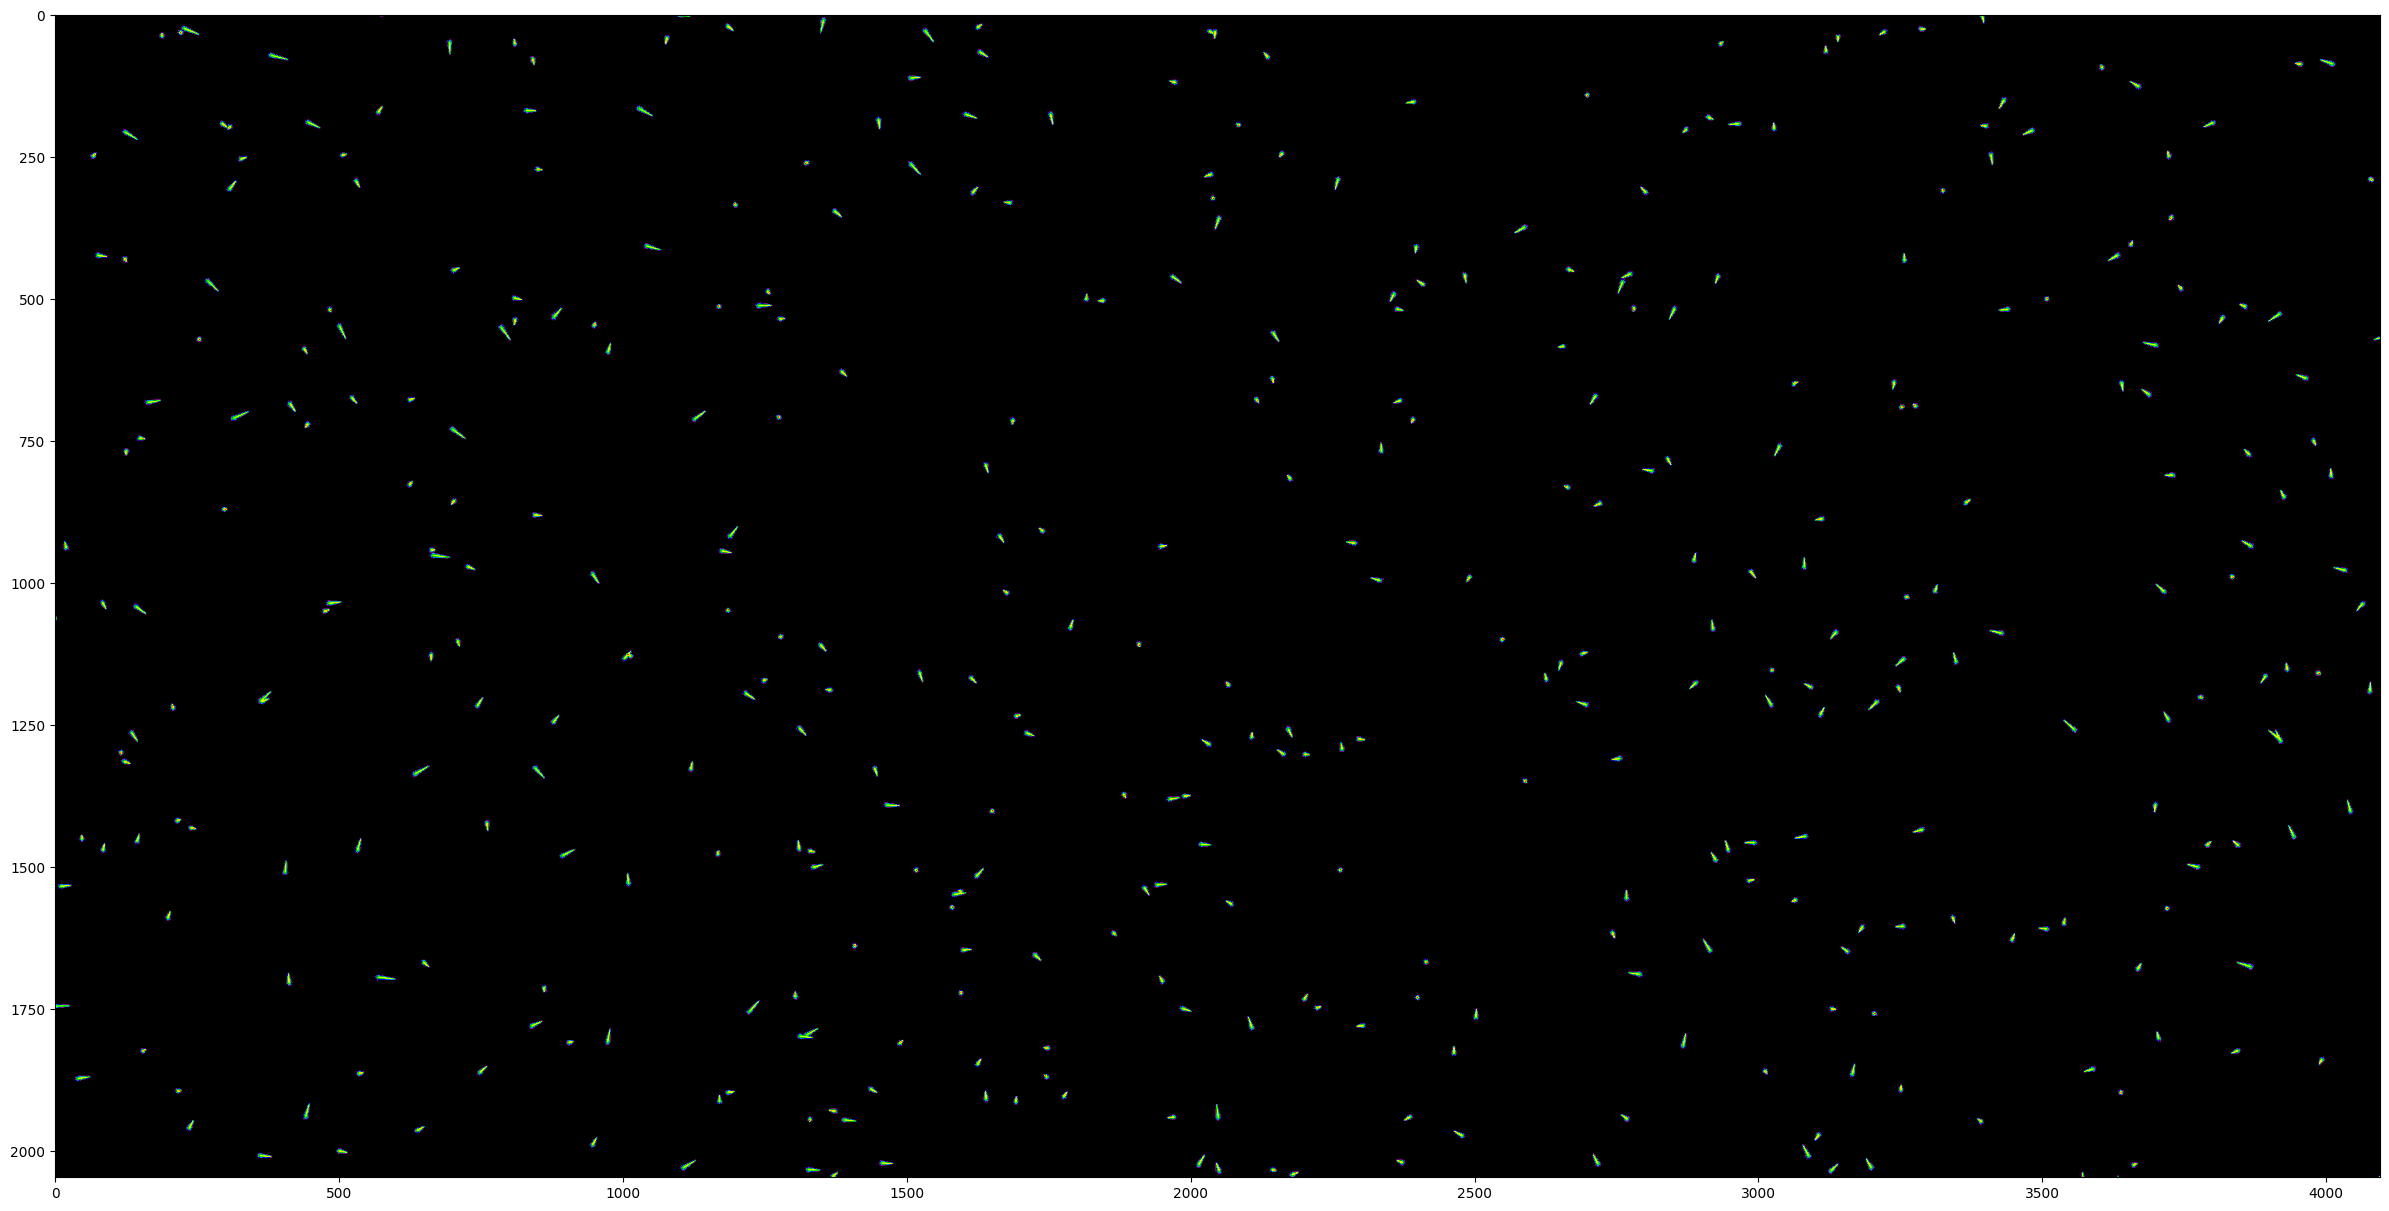

In [7]:
if save_as_fits_cube:
    # grafica el primer ccd del archivo fits global
    with fits.open(fits_folder+filename+'.fits') as hdul:
        hdul.info()
        img = hdul[0].data
        #img = np.log(img, out=np.zeros_like(img), where=(img!=0))
        plt.figure(figsize = (30,30))
        plt.imshow(img, cmap = plt.cm.nipy_spectral)